<a href="https://colab.research.google.com/github/alexzendersen/stat_practice/blob/main/hometask_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 42

### Problem 1
Implement serial test and apply to a `samples`

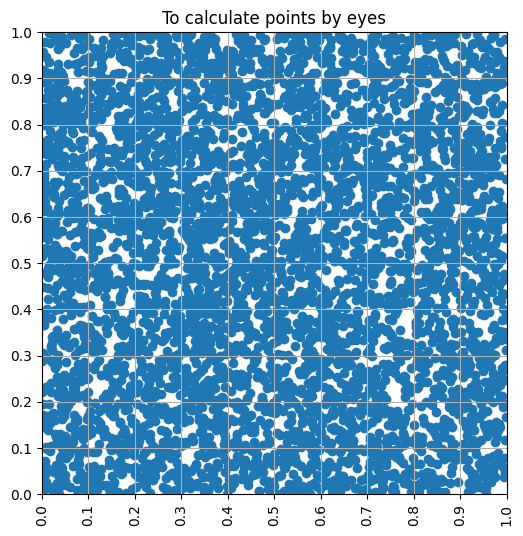

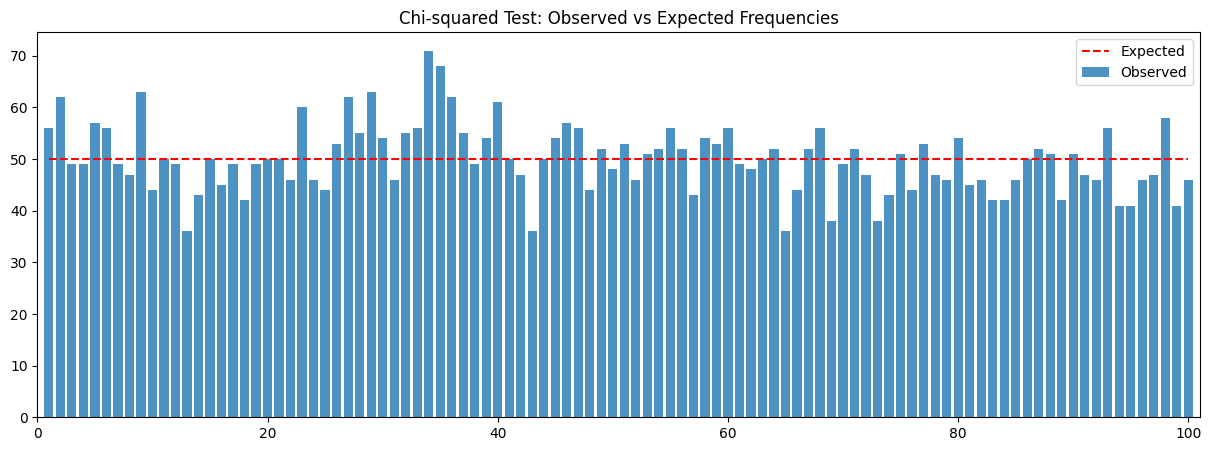

(array([56., 62., 49., 49., 57., 56., 49., 47., 63., 44., 50., 49., 36.,
        43., 50., 45., 49., 42., 49., 50., 50., 46., 60., 46., 44., 53.,
        62., 55., 63., 54., 46., 55., 56., 71., 68., 62., 55., 49., 54.,
        61., 50., 47., 36., 50., 54., 57., 56., 44., 52., 48., 53., 46.,
        51., 52., 56., 52., 43., 54., 53., 56., 49., 48., 50., 52., 36.,
        44., 52., 56., 38., 49., 52., 47., 38., 43., 51., 44., 53., 47.,
        46., 54., 45., 46., 42., 42., 46., 50., 52., 51., 42., 51., 47.,
        46., 56., 41., 41., 46., 47., 58., 41., 46.]),
 array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 5

In [10]:
k = 10

num_samples = 10000
assert num_samples%2 == 0, "num_samples should be multiple by 2"
samples = [rng() for _ in range(num_samples)]

pairs_x, pairs_y = list(samples[:-1:2]), list(samples[1::2])
X_points, Y_points = np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)
plt.figure(figsize=(6, 6))
plt.title("To calculate points by eyes")
plt.scatter(pairs_x, pairs_y)
plt.grid(True)
plt.xticks(X_points, rotation = 90)
plt.yticks(Y_points)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
f_obs = np.histogram2d(pairs_x, pairs_y, [X_points, Y_points])[0].flatten()
f_exp = np.full(k**2, ((num_samples // 2) / k**2))

plt.figure(figsize=(15, 5))
plt.title('Chi-squared Test: Observed vs Expected Frequencies')
plt.bar(range(1, k**2+1), f_obs, alpha = 0.8, label = 'Observed')
plt.plot(range(1, k**2+1), f_exp, 'r--', label = 'Expected')
plt.xlim(0, k**2 + 1)
plt.legend(loc='best')
plt.show()

f_obs, f_exp, stats.chisquare(f_obs, f_exp)


### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

### Problem 2*
Implement permutation test and apply to a `samples`

In [11]:
from itertools import permutations
from math import factorial

def corr_perm(origin):
  s = sorted(origin)
  p = [s.index(i) for i in origin]
  return tuple(p)

d = 10
num_samples = 1000
assert num_samples % d == 0, f"num_samples should be multiple by d = {d}"
samples = [rng() for _ in range(num_samples)]

seq = [np.array(samples[i : i + d]) for i in range(0, num_samples, d)]

possible_perms = list(permutations(np.arange(d)))
cd = {perm: 0 for perm in possible_perms}
for s in seq:
  cd[corr_perm(s)] += 1

f_exp = np.full(factorial(d), (num_samples // d) / factorial(d))
f_obs = np.array(list(cd.values()))

f_obs, f_exp, stats.chisquare(f_obs, f_exp)


(array([0, 0, 0, ..., 0, 0, 0]),
 array([2.75573192e-05, 2.75573192e-05, 2.75573192e-05, ...,
        2.75573192e-05, 2.75573192e-05, 2.75573192e-05]),
 Power_divergenceResult(statistic=3628700.000000026, pvalue=0.5145586770490044))

The choice of parameters $m$, $a$ and $c$ has a significant impact on the quality of the sequence. If the parameters are chosen unsuccessfully, it can lead to unexpected consequences:

In [12]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

The histogram of the distribution is similar to a uniform distribution:

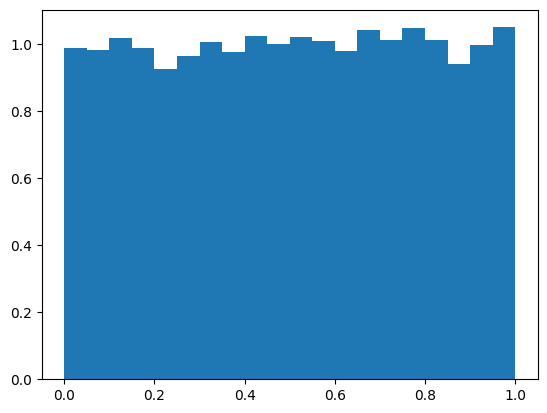

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.hist(random, 20, density=True)
plt.show()

However, the series test shows that the points are located on hyperplanes, which does not fit well with the notion of randomness:

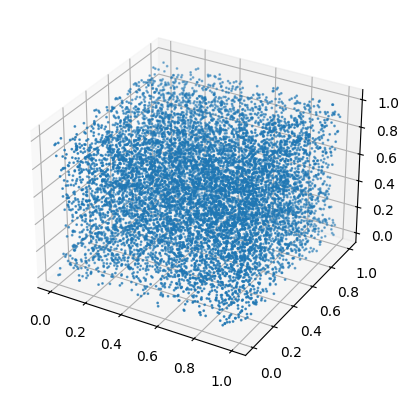

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(random[::3], random[1::3], random[2::3], s=1)
plt.show()

In [15]:
import plotly.express as px

fig = px.scatter_3d(x=random[::3], y=random[1::3], z=random[2::3], opacity=0.1)
fig.update_traces(marker_size = 2)
fig.show()

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [16]:
# from scipy.stats import
from tqdm import tqdm


def Random_Spheres_Test(generator):
  samples = [generator() for _ in range(30000)]
  points_x, points_y, points_z = samples[::3], samples[1::3], samples[2::3]

  dists = {}

  # да, n^2, но что поделать...
  for x, y, z in tqdm(zip(points_x, points_y, points_z)):
    min_dist = 10e9
    for x1, y1, z1 in zip(points_x, points_y, points_z):
      if (x == x1 and y == y1 and z == z1):
        continue

      d = np.sqrt((x - x1)**2 + (y - y1)**2 + (z - z1)**2)
      if (d < min_dist):
        min_dist = d

    dists.update({(x, y, z) : 4/3 * np.pi * min_dist**3})

  v = list(dists.values())

  return stats.kstest(v, lambda x: stats.expon.cdf(x, scale = np.mean(v)))

def series_test(gen):
  k = 30

  num_samples = 30000
  assert num_samples%3 == 0, "num_samples should be multiple by 3"
  samples = [gen() for _ in range(num_samples)]

  pairs_x, pairs_y, pairs_z = list(samples[:-1:3]), list(samples[1::3]), list(samples[2::3])
  X_points, Y_points, Z_points = np.linspace(0, 1, k+1), np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)
  plt.figure(figsize=(6, 6))
  fig = px.scatter_3d(x=pairs_x, y=pairs_y, z=pairs_z, opacity=0.8)
  fig.update_traces(marker_size = 2)
  fig.show()

  f_obs = np.histogramdd(np.array(list(zip(pairs_x, pairs_y, pairs_z))), [X_points, Y_points, Z_points])[0].flatten()
  f_exp = np.full(k**3, ((num_samples // 3) / k**3))

  # plt.figure(figsize=(15, 5))
  # plt.title('Chi-squared Test: Observed vs Expected Frequencies')
  # plt.bar(range(1, k**3+1), f_obs, alpha = 0.8, label = 'Observed')
  # plt.plot(range(1, k**3+1), f_exp, 'r--', label = 'Expected')
  # plt.xlim(0, k**3 + 1)
  # plt.legend(loc='best')
  # plt.show()

  return stats.chisquare(f_obs, f_exp)


print(f"Serial test p_value for bad generator {series_test(rng_bad).pvalue}, for good_generator {series_test(rng).pvalue}, for np.radnom.uniform {series_test(np.random.uniform).pvalue}")
# print(f"Random Sphere Test p_value for bad generator {Random_Spheres_Test(rng_bad).pvalue}, for good_generator {Random_Spheres_Test(rng).pvalue}, for np.radnom.uniform {Random_Spheres_Test(np.random.uniform).pvalue}")



Serial test p_value for bad generator 0.0, for good_generator 0.6919398165659935, for np.radnom.uniform 0.3174855613182686


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

elem = 0, count = 199
elem = 1, count = 447
elem = 2, count = 242
elem = 3, count = 352
elem = 4, count = 455
elem = 5, count = 807
elem = 6, count = 162
elem = 7, count = 35
elem = 8, count = 1
elem = 9, count = 300


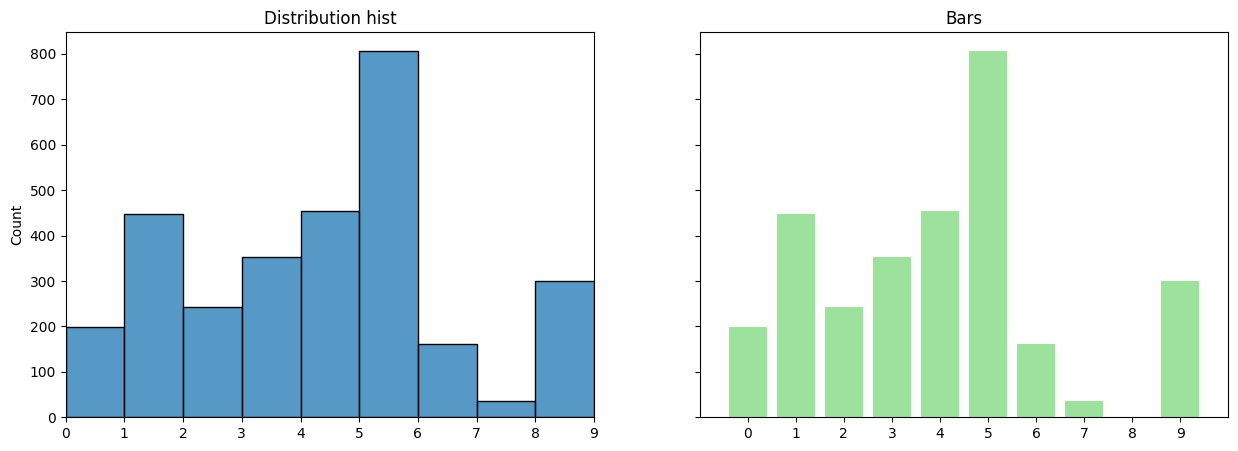

In [17]:
import seaborn as sns

def weighted_distr(num_samples):
  arr = list(np.arange(10))
  w = [0.12,0.3,0.167,0.24,0.31,0.54,0.111,0.02,0.001,0.2]

  w /= np.sum(w)

  samples = np.array([np.random.uniform() for _ in range(num_samples)])

  pref_sum = np.cumsum(w)

  # print(w, pref_sum, samples[0], np.abs(pref_sum[pref_sum >= samples[0]] - samples[0]))
  f = np.vectorize(lambda x: arr[np.argmax(pref_sum == pref_sum[pref_sum >= x][0])])

  # print(np.unique(f(samples), return_counts = True))

  return f(samples)

num_samples = 3000
samples = weighted_distr(num_samples)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), sharey = True)

sns.histplot(samples, bins = range(10), ax = ax[0])
ax[0].set_title("Distribution hist")
ax[0].set_xlim(0, 9)
ax[0].set_xticks(range(10))


# ax[0].hist(samples, bins=range(10),)

h = np.histogram(samples, np.linspace(0, 9, 11))

l = list(zip(h[0], range(10)))

for c, el in l:
  print(f"elem = {el}, count = {c}")

sns.barplot(x = range(10), y = h[0], errorbar = None, color = "lightgreen")
ax[1].set_title("Bars")
# ax[1].bar(range(10), h[0])
ax[1].set_xlim(-1, 10)
ax[1].set_xticks(range(10))
plt.show()


## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

In [18]:
def inv_F(y, l):
  return np.log(1-y) * (-1/l)

l = 3 #lambda
samples = [inv_F(np.random.uniform(), l) for _ in range(1000)]

stats.kstest(samples, lambda x: stats.expon.cdf(x, scale = 1/l))

KstestResult(statistic=0.02616528273379476, pvalue=0.4920717048071839, statistic_location=0.12312543009335808, statistic_sign=1)

## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

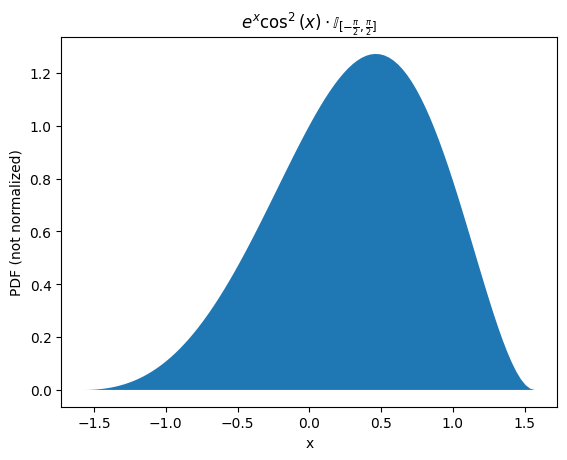

In [19]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

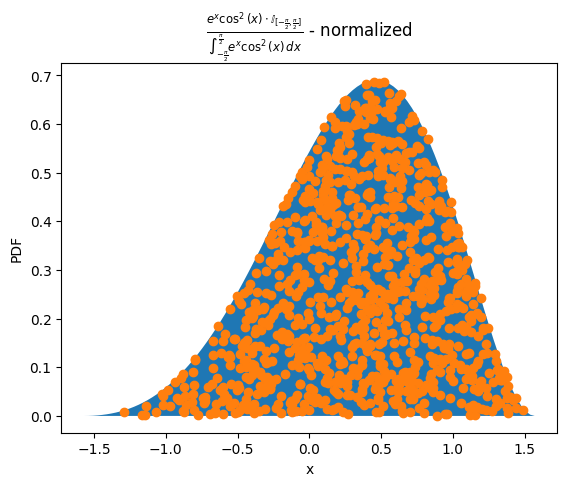

In [20]:
import scipy.integrate as integrate

def den(x, norm):
  return np.exp(x) * np.cos(x) ** 2 / norm * ((x >= -np.pi/2) & (x<=np.pi/2))

num_samples = 1000

inter = integrate.quad(lambda x: np.exp(x) * np.cos(x) ** 2, -np.pi/2, np.pi/2)[0] # to normalize


x_max = np.arctan(1/2)
max_value = np.exp(x_max) * np.cos(x_max) ** 2 / inter

samples_x, samples_y = [], []

while len(samples_x) < num_samples:
  s = np.random.uniform(-np.pi/2, np.pi/2)
  d = np.random.uniform(0, max_value)

  if (d < den(s, inter)):
    samples_x.append(s)
    samples_y.append(d)

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 / inter
plt.fill_between(x, 0, density)
plt.ylabel('PDF')
plt.xlabel('x')
plt.title(r'$\frac{e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}}{\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} e^x \cos^2(x) \,dx}$ - normalized')
plt.scatter(samples_x, samples_y)

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

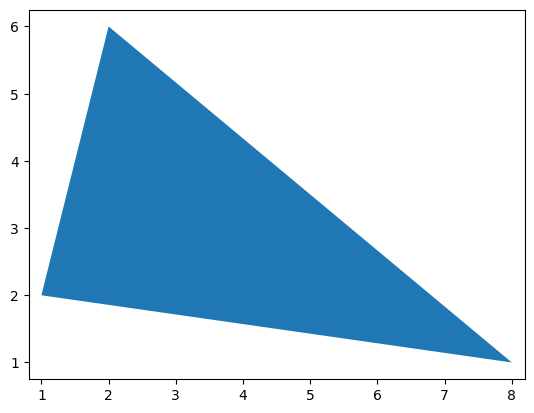

In [21]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

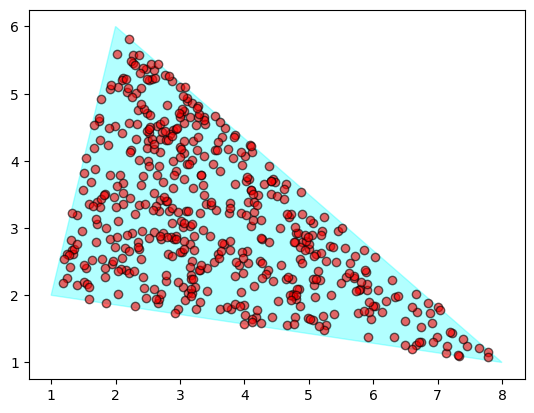

In [22]:
vertices = np.array([[1, 2], [2, 6], [8, 1]])

def gen_tr(vertices, num_samples):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]

    points = []
    for _ in range(num_samples):

        u = np.random.rand()
        v = np.random.rand()

        if u + v > 1:
            u, v = 1 - u, 1 - v


        a = 1 - u - v
        b = u
        c = v


        x = a * x1 + b * x2 + c * x3
        y = a * y1 + b * y2 + c * y3

        points.append([x, y])

    return np.array(points)

num_samples = 500
points = gen_tr(vertices, num_samples)
plt.fill(vertices[:, 0], vertices[:, 1], alpha=0.3, color='cyan')
plt.scatter(points[:, 0], points[:, 1], color='red', alpha = 0.6, edgecolor='black')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

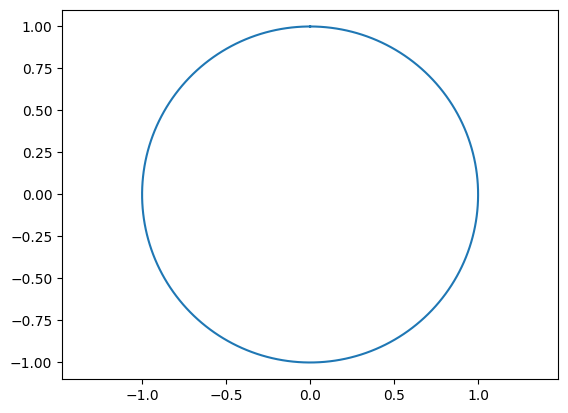

In [23]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

(500, 1) (500, 1)


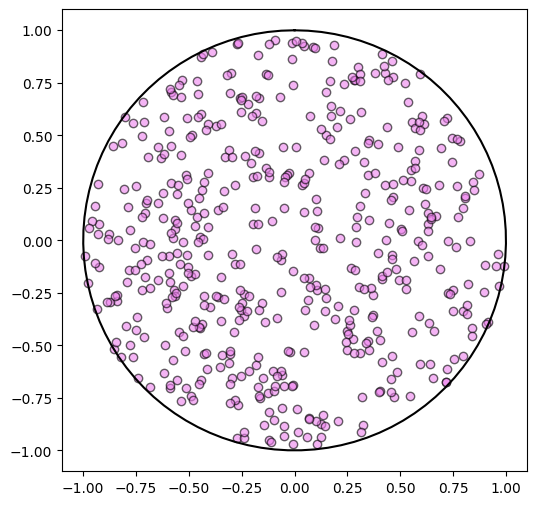

In [51]:
vertices = np.array([[1, 2], [2, 6], [8, 1]])

def gen_circle(num_samples):
  points = []
  #square with area = 2pi
  t1 = np.random.uniform(0, 1, size = (num_samples, 1))
  t2 = np.random.uniform(0, 2 * np.pi, size = (num_samples, 1))

  print(t1.shape, t2.shape)

  t = np.concatenate([t1, t2], axis = 1)

  xs = np.cos(t[:,1]) * np.sqrt(t[:,0])
  ys = np.sin(t[:,1]) * np.sqrt(t[:,0])

  return xs, ys

num_samples = 500
px, py = gen_circle(num_samples)
plt.figure(figsize = (6, 6))
val = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(val), np.cos(val), color = 'black')
plt.scatter(px, py, color='violet', alpha = 0.6, edgecolor='black')
plt.show()

(100000, 1) (100000, 1)
(100, 100) 2


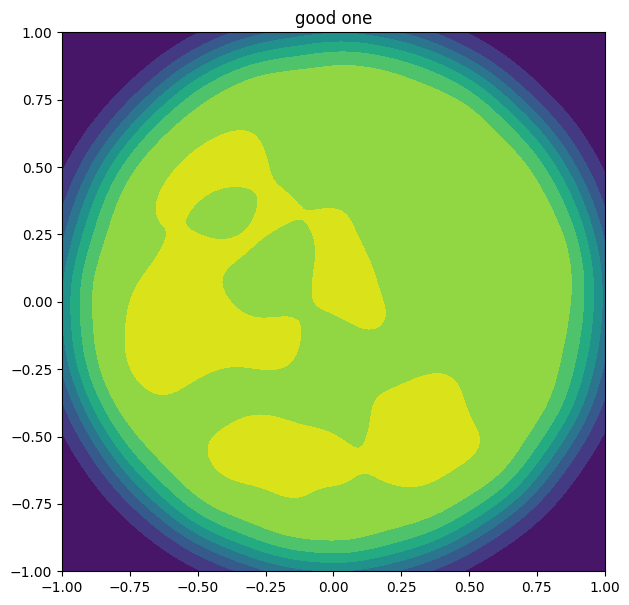

In [88]:
#let's prove that points distributed uniformly
#using kde
from scipy.stats import gaussian_kde

num_samples = 100000
px, py = gen_circle(num_samples)
data = np.concatenate([px.reshape(1, -1), py.reshape(1, -11)])

kde = gaussian_kde(data, 0.2)
kk = np.vectorize(lambda x, y: kde([x, y]))


gx, gy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
val = kk(gx, gy)

print(val.shape, val.ndim)

plt.figure(figsize = (7, 7))
plt.title("good one")
plt.contourf(gx, gy, val, levels = 10)

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [25]:
import seaborn as sns

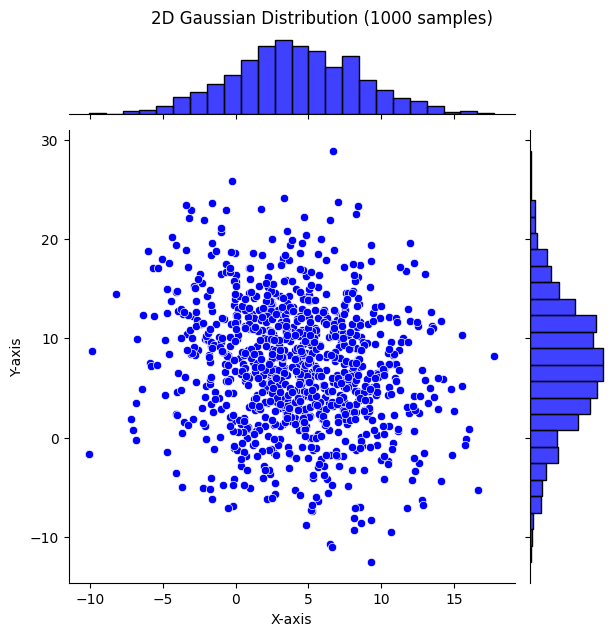

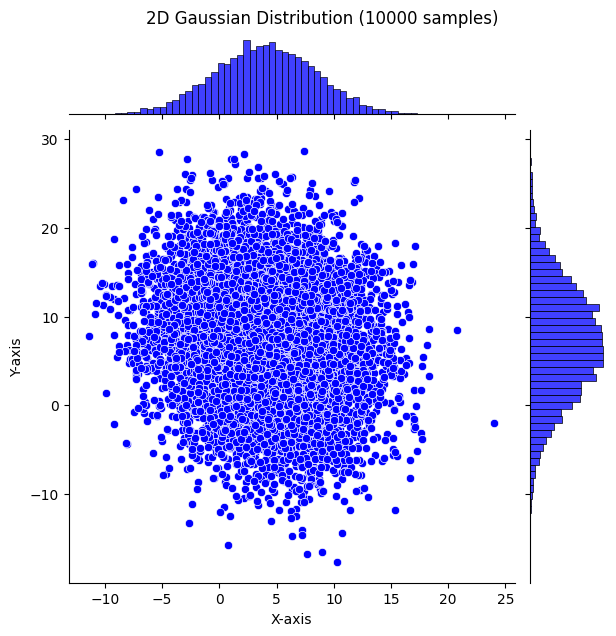

In [40]:
def gen_samples(num_samples, sigma, mu):
  assert type(mu) == np.ndarray and mu.shape == (2,) and type(sigma) == np.ndarray, "NOOOO"
  L = np.linalg.cholesky(sigma)


  points = []
  while len(points) < num_samples:
    u1, u2 = np.random.uniform(-1, 1, size = (2, ))
    s = u1**2 + u2**2
    if s == 0 or s > 1:
      continue

    he = np.sqrt(-2 * np.log(s) / s)
    z1 = u1 * he
    z2 = u2 * he
    Z = np.array([z1, z2])
    sample = mu + L @ Z
    points.append(np.array(sample))

  return np.array(points)

sigma = np.array([[20, -4], [-4, 40]])
mu = np.array([4, 7])

n = 1000


# u1, u2 = np.random.rand(2, n)
# r = np.sqrt(-2 * np.log(u1))
# theta = 2 * np.pi * u2
# x = r * np.cos(theta)
# y = r * np.sin(theta)

samples = gen_samples(n, sigma, mu)
joint_plot = sns.jointplot(x=samples[:, 0], y=samples[:, 1], color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution (1000 samples)', y=1.02)
plt.show()
n = 10000
samples = gen_samples(n, sigma, mu)
joint_plot = sns.jointplot(x=samples[:, 0], y=samples[:, 1], color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution (10000 samples)', y=1.02)
plt.show()

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [90]:
from scipy.special import binom
import math

def compute_B(n):
    sequence = [1, 1, 2]
    if n <= 2:
        return sequence[n]
    for i in range(3, n + 1):
        next_val = sum(binom(i - 1, j) * sequence[j] for j in range(i))
        sequence.append(next_val)
    return sequence[-1]

def determine_K(n, B_n=None):
    if B_n is None:
        B = compute_B(n)
    else:
        B = B_n
    random_val = np.random.rand()
    cumulative = 0
    index = 0
    while True:
        term = (index**n) / (B * np.e * math.factorial(index))
        cumulative += term
        if random_val < cumulative:
            return index
        index += 1

def create_C_array(n, B_n=None):
    K = determine_K(n, B_n)
    array = [int(np.random.rand() * K) + 1 for _ in range(n)]
    return array

def form_partition(data, B_n=None):
    size = len(data)
    labels = create_C_array(size, B_n)
    groups = {}
    for idx, label in enumerate(labels):
        if label in groups:
            groups[label].append(data[idx])
        else:
            groups[label] = [data[idx]]
    return list(groups.values())

examples = [form_partition([1, 2, 3, 4, 5]) for _ in range(5)]
for ex in examples:
    print(ex)

total = 0
trials = 1000
for _ in range(trials):
    unique_count = len(np.unique(create_C_array(100, compute_B(100))))
    total += unique_count
average = total / trials
print(average)

[[1], [2, 4], [3], [5]]
[[1, 3, 4], [2], [5]]
[[1], [2, 3, 5], [4]]
[[1], [2, 5], [3, 4]]
[[1, 4], [2, 3, 5]]
28.6


# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



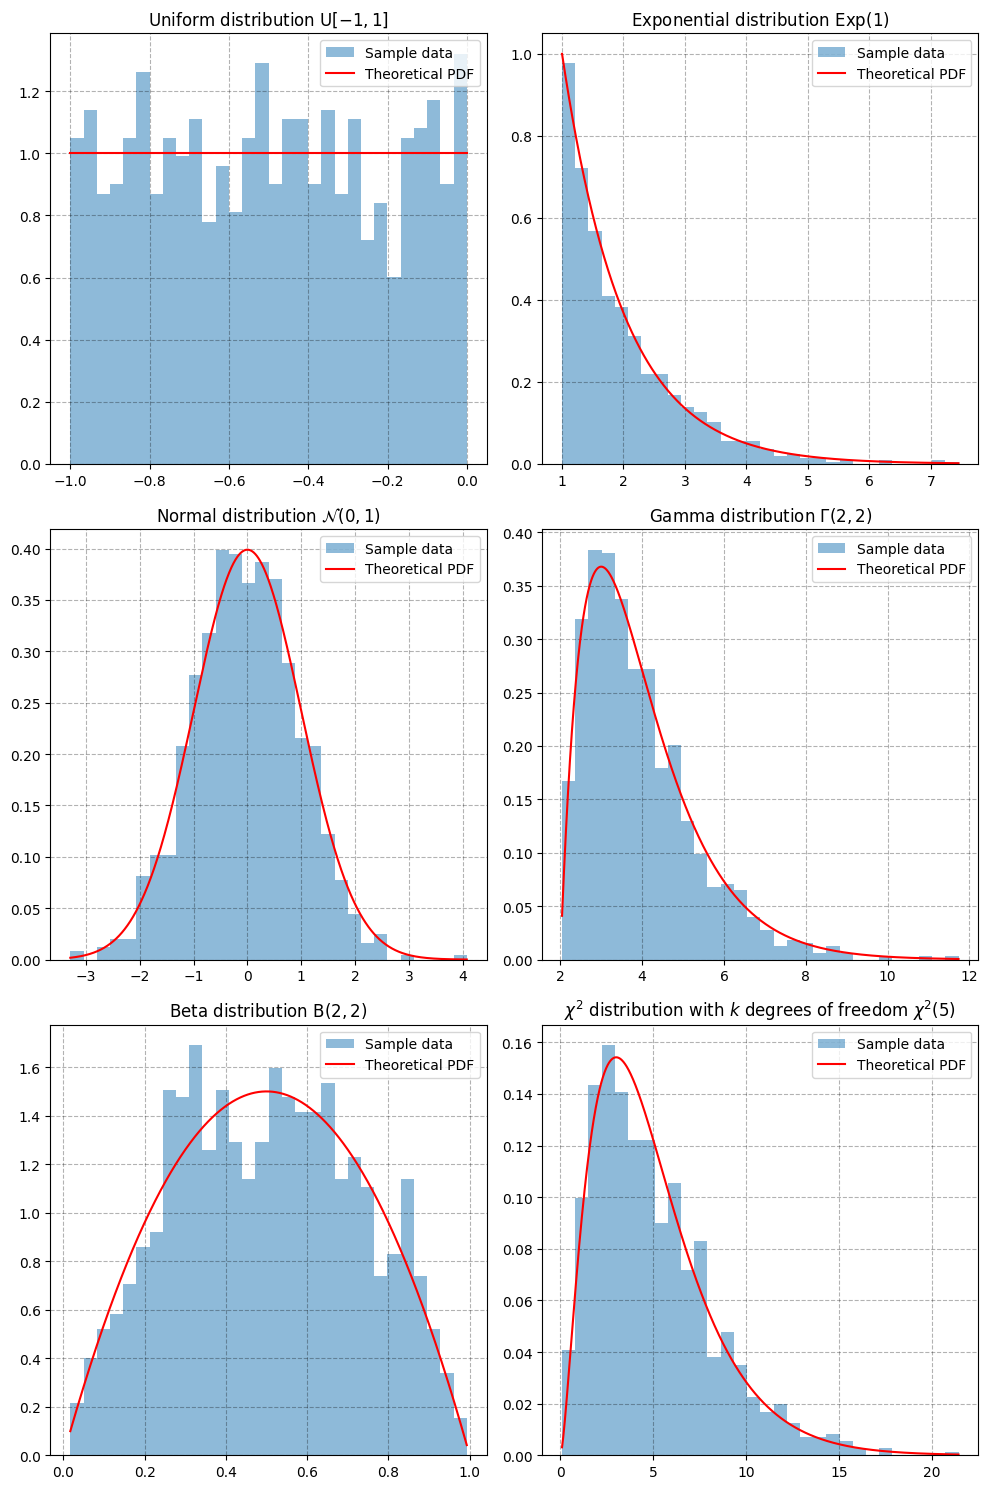

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
